In [89]:
#https://code.datasciencedojo.com/datasciencedojo/datasets/blob/master/Istanbul%20Stock%20Exchange/README.md

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [90]:
df = pd.read_excel('/Users/saanikak/Documents/Learning/MLBootcamp/Datasets/data_akbilgic.xlsx')

In [91]:
df.head()

,Unnamed: 0,TL BASED,USD BASED,imkb_x,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,date,ISE,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
1,2009-01-05 00:00:00,0.0357537,0.0383762,-0.00467931,0.00219342,0.00389438,0,0.0311902,0.012698,0.0285245
2,2009-01-06 00:00:00,0.0254259,0.0318127,0.00778674,0.00845534,0.0128656,0.00416245,0.0189196,0.0113407,0.00877264
3,2009-01-07 00:00:00,-0.0288617,-0.026353,-0.0304691,-0.0178331,-0.0287346,0.0172929,-0.0358986,-0.0170728,-0.0200154
4,2009-01-08 00:00:00,-0.0622081,-0.0847159,0.00339136,-0.0117263,-0.000465999,-0.0400613,0.0282832,-0.00556096,-0.0194238


In [92]:
df.columns

Index(['Unnamed: 0', 'TL BASED', 'USD BASED', 'imkb_x', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [93]:
df = df.rename(columns = {'Unnamed: 0': 'Date', 
                         'TL BASED': 'ISE', 
                         'USD BASED': 'ISE_Index', 
                         'imkb_x': 'SP', 
                         'Unnamed: 4': 'DAX', 
                         'Unnamed: 5': 'FTSE', 
                          'Unnamed: 6': 'NIKKEI', 
                          'Unnamed: 7': 'BOVESPA', 
                          'Unnamed: 8': 'EU', 
                          'Unnamed: 9': 'EM'
                         
                         })

In [94]:
df = df.iloc[1::, :]

In [95]:
cols_to_drop = ['Date']
df.drop(cols_to_drop, axis = 1, inplace = True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 1 to 536
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ISE        536 non-null    object
 1   ISE_Index  536 non-null    object
 2   SP         536 non-null    object
 3   DAX        536 non-null    object
 4   FTSE       536 non-null    object
 5   NIKKEI     536 non-null    object
 6   BOVESPA    536 non-null    object
 7   EU         536 non-null    object
 8   EM         536 non-null    object
dtypes: object(9)
memory usage: 37.8+ KB


In [97]:
df['ISE'] = df['ISE'].astype(float)
df['ISE_Index'] = df['ISE_Index'].astype(float)
df['SP'] = df['SP'].astype(float)
df['DAX'] = df['DAX'].astype(float)
df['FTSE'] = df['FTSE'].astype(float)
df['NIKKEI'] = df['NIKKEI'].astype(float)
df['BOVESPA'] = df['BOVESPA'].astype(float)
df['EU'] = df['EU'].astype(float)
df['EM'] = df['EM'].astype(float)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 1 to 536
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ISE        536 non-null    float64
 1   ISE_Index  536 non-null    float64
 2   SP         536 non-null    float64
 3   DAX        536 non-null    float64
 4   FTSE       536 non-null    float64
 5   NIKKEI     536 non-null    float64
 6   BOVESPA    536 non-null    float64
 7   EU         536 non-null    float64
 8   EM         536 non-null    float64
dtypes: float64(9)
memory usage: 37.8 KB


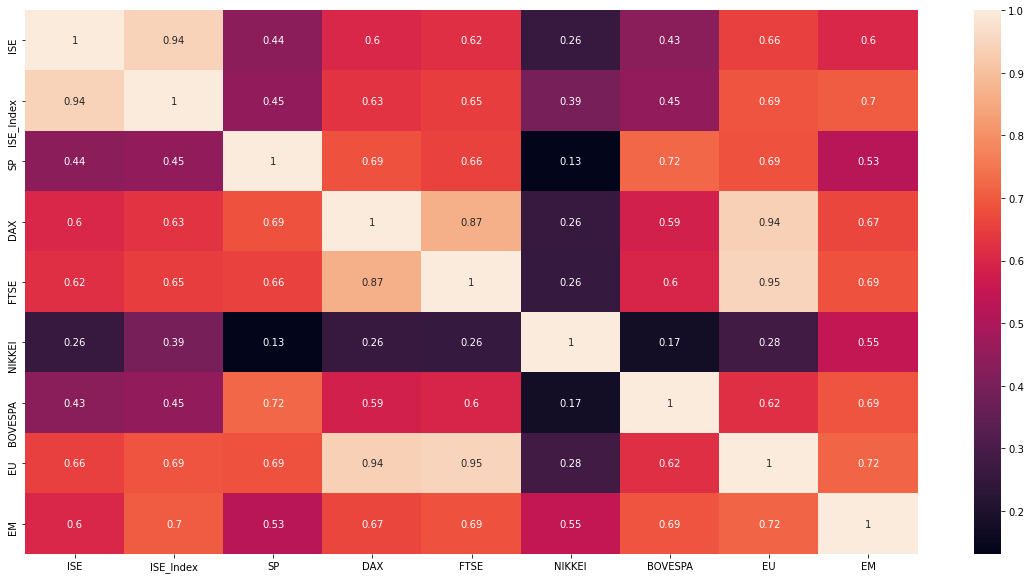

In [99]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [105]:
cols_to_include = df.drop('ISE', axis = 1).columns[:]
X = df.loc[:, cols_to_include].values
y = df['ISE'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [106]:
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# regressor.coef_[0][2]

LinearRegression()

In [107]:
y_pred = regressor.predict(X_test)
y_pred

array([ 0.01, -0.01, -0.01,  0.  ,  0.01, -0.02, -0.02,  0.01, -0.  ,
        0.01,  0.01, -0.01,  0.  ,  0.01,  0.01, -0.01,  0.  ,  0.02,
        0.02,  0.03,  0.02, -0.01,  0.03,  0.  ,  0.02, -0.02,  0.  ,
        0.  , -0.01,  0.05, -0.  , -0.03,  0.03, -0.02,  0.03,  0.03,
       -0.02,  0.01,  0.01,  0.01,  0.02,  0.01, -0.  ,  0.01, -0.02,
       -0.01,  0.  , -0.03, -0.06,  0.02, -0.01, -0.01,  0.02,  0.01,
        0.03,  0.01,  0.  ,  0.02, -0.03, -0.  ,  0.01,  0.01, -0.  ,
        0.01,  0.  ,  0.01, -0.01, -0.02, -0.04,  0.01,  0.01, -0.01,
        0.01, -0.01,  0.  ,  0.  , -0.04,  0.08,  0.03,  0.01, -0.02,
       -0.01,  0.03, -0.  ,  0.01,  0.01,  0.03,  0.  ,  0.01,  0.01,
       -0.01,  0.01,  0.  , -0.01, -0.  ,  0.02,  0.01, -0.03,  0.02,
        0.  , -0.  ,  0.01,  0.  ,  0.01, -0.01, -0.02,  0.01, -0.04,
       -0.01, -0.03,  0.01, -0.01, -0.01,  0.01,  0.01,  0.  , -0.01,
        0.01,  0.  ,  0.01,  0.01, -0.  ,  0.  ,  0.  ,  0.01, -0.  ,
        0.  ,  0.02,

In [108]:
y_test

array([ 0.  , -0.01, -0.02, -0.01,  0.01, -0.02, -0.02,  0.02, -0.  ,
        0.01,  0.01, -0.01,  0.01,  0.01,  0.  , -0.01,  0.  ,  0.02,
        0.02,  0.02,  0.02, -0.01,  0.03,  0.  ,  0.02, -0.02,  0.  ,
       -0.  , -0.01,  0.05, -0.  , -0.02,  0.04, -0.01,  0.03,  0.03,
       -0.01,  0.01,  0.  ,  0.01,  0.03,  0.01, -0.  ,  0.01, -0.02,
       -0.01,  0.  , -0.03, -0.06,  0.01,  0.  , -0.01,  0.01,  0.  ,
        0.03,  0.01,  0.  ,  0.02, -0.01, -0.01,  0.01,  0.01, -0.01,
        0.01,  0.01,  0.02, -0.01, -0.02, -0.03,  0.  ,  0.01,  0.  ,
        0.  , -0.  , -0.  ,  0.01, -0.04,  0.07,  0.02,  0.01, -0.02,
       -0.  ,  0.02,  0.  ,  0.01,  0.  ,  0.03,  0.  ,  0.  ,  0.01,
       -0.01,  0.01,  0.  ,  0.  , -0.01,  0.02,  0.01, -0.03,  0.02,
       -0.  , -0.  ,  0.01, -0.  ,  0.02, -0.01, -0.02,  0.01, -0.02,
       -0.01, -0.04,  0.01, -0.  , -0.01,  0.  ,  0.01, -0.  , -0.  ,
        0.01,  0.01,  0.01,  0.02, -0.01,  0.  ,  0.  ,  0.01,  0.  ,
       -0.  ,  0.02,

In [111]:
np.set_printoptions(precision=10)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 0.0062059554  0.002509442 ]
 [-0.0145859371 -0.013824293 ]
 [-0.0116828183 -0.01843108  ]
 [ 0.0018617363 -0.0057746   ]
 [ 0.0127657062  0.009310309 ]
 [-0.0234723544 -0.02390659  ]
 [-0.0163748438 -0.017664432 ]
 [ 0.0086959313  0.016307467 ]
 [-0.002567851  -0.003990517 ]
 [ 0.0068086929  0.012676973 ]
 [ 0.008617968   0.008033964 ]
 [-0.0089555354 -0.010111415 ]
 [ 0.0015897842  0.013406293 ]
 [ 0.0146469264  0.012248015 ]
 [ 0.0067347245  0.004478365 ]
 [-0.0129859641 -0.010043636 ]
 [ 0.0040088064  0.002184557 ]
 [ 0.0171005662  0.019627036 ]
 [ 0.0168131633  0.019062249 ]
 [ 0.0338580918  0.024517037 ]
 [ 0.020844453   0.018495281 ]
 [-0.0063733873 -0.010180284 ]
 [ 0.0281127129  0.032511512 ]
 [ 0.0008549959  0.00167273  ]
 [ 0.0207514155  0.020219135 ]
 [-0.0205229612 -0.021815769 ]
 [ 0.0048103509  0.00322285  ]
 [ 0.0018196666 -0.002744684 ]
 [-0.0104223761 -0.007133473 ]
 [ 0.0513475847  0.046831302 ]
 [-0.0047479101 -0.002213036 ]
 [-0.0308772255 -0.02278477  ]
 [ 0.029